In [ ]:
whichcomp = 'Laptop'    # Which computer is being used 'Laptop' or 'LabPC'

In [ ]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
import defaultParams
import utils
import sys
import importlib
from tqdm import tqdm
from time import sleep
import os

from pynwb import NWBHDF5IO # working with nwb data
#import nrrd # just needed for working with allenccf annotation volumes.

import numpy as np
from scipy import stats
import pandas as pd

import matplotlib as mpl
mpl.rcParams['font.size'] = 12
import matplotlib.pyplot as plt
import seaborn as sns # for pretty plots, sometimes
import opinionated as op # https://github.com/MNoichl/opinionated (for more pretty plots)
# plt.style.use('dark_background')
# plt.style.use(
#     'https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
from ipywidgets import widgets      # for interactive plots
%matplotlib widget 
%matplotlib ipympl 

In [ ]:

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# RERUN THIS WHEN YOU MAKE UPDATES TO ANY OF THESE MODULES AND DON'T WANT TO RESTART KERNEL
_ = importlib.reload(sys.modules['utils'])
_ = importlib.reload(sys.modules['defaultParams'])

In [ ]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
### SAVE A FIGURE
# fpth = os.path.join(r'C:\Users\munib\Documents\Economo-Lab\code\map-ephys\figs',sub,date)
# fname = plt.gca().get_title() + '_' + date
# plotUtils.mysavefig(fpth,fname)

In [ ]:

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# PARAMETERS
# 'par' is associated with loading and preprocessing the data
# 'params' contains properties of the data itself (trials, units ids, etc.)


if whichcomp == 'Laptop':  # Personal Laptop
    dataDir = r'C:\Users\Jackie\Documents\GradSchool\EconomoLab\Susu Dataset'
else:  # Lab PC
    dataDir = 'C:\Susu NWB Dataset'

proj = "map" # subdirectory of dataDir

sub = '456773' # subject/animal id
date = '20191002' # session date

par = defaultParams.getDefaultParams() 

# change any default params below
par.regions = ['left ALM']
# par.regions = ['left ALM',  'left Striatum', 'right Medulla','left Midbrain']
# par.regions = utils.getAllRegions(sub,date)
# par.regions = ['MOs','IRN'] # acronyms in ccf that contain these strings
# par.regions = ['MOs'] # acronyms in ccf that contain these strings

par.behav_only = 0

In [ ]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# LOAD DATA

nwbfile, units_df, trials_df, trialdat, psth, params = \
    utils.loadData(os.path.join(dataDir, proj),sub,date,par,behav_only=par.behav_only)
# nwbfile - the raw data file in read only mode
# units_df - dataframe containing info about neurons/units
# trialdat - dict containing single trial firing rates (trialdat[region] = (time,trials,units))
# psth - dict of PSTHs (psth[region] = (time,units,conditions))
# params - session-specific params used for analyses

In [ ]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
# TODO: GET KINEMATICS
# most of the heavy lifting done below. just need to functionalize and get some actual kinematics.

In [ ]:

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# PERFORMANCE
cols = utils.Colors()

# cond2use = [0,1,2]
# c = [(0.3,0.3,0.3), cols.rhit, cols.lhit]
# labels = ['all', 'R', 'L']

cond2use = [3,4,7,8]
c = [cols.rhit, cols.lhit, cols.rmiss, cols.lmiss]
labels = ['R', 'L', 'Rinhib', 'Linhib']

perf = utils.taskPerformance(trials_df, params.trialid, cond2use, c, labels, plot=1)

# fpth = os.path.join(r'C:\Users\munib\Documents\Economo-Lab\code\map-ephys\figs',sub,date)
# fname = 'performance' + '_inactivation'
# utils.mysavefig(fpth,fname)

In [ ]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# LICK RASTER
# cond2plot = [3,4,7,8]
cond2plot = [3,4]
cols = utils.Colors()
c = [cols.rhit, cols.lhit, cols.rmiss, cols.lmiss]
labels = ['R','L','Rin','Lin']
utils.lickRaster(nwbfile, trials_df, par, params, cond2plot, c, labels)

# fpth = os.path.join(r'C:\Users\munib\Documents\Economo-Lab\code\map-ephys\figs',sub,date)
# fname = 'lickRaster_hit_inactivation'
# utils.mysavefig(fpth,fname)

In [ ]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# PLOT PSTHs
_ = importlib.reload(sys.modules['utils'])
region = 'left ALM'
cond2plot = [3,4]
# cond2plot = [1,2,7,8]
cols = utils.Colors()
# c = [cols.rmiss, cols.lmiss, cols.rhit, cols.lhit] 
c = [cols.rhit, cols.lhit, cols.rmiss, cols.lmiss] 
lw = [2,2,1,1]
# labels = ['r','l','rin','lin']
labels = ['r','l']
utils.plotPSTH(trialdat, region, cond2plot, c, lw, 
                   params, par, units_df, nwbfile,
                   legend=labels, plotRaster=1,plotWave=1,buffer=0)

# fpth = os.path.join(r'C:\Users\munib\Documents\Economo-Lab\code\map-ephys\figs',sub,date)
# fname = plt.gcf().axes[0].get_title()
# utils.mysavefig(fpth,fname)

# without ipywidgets (no unit slider)
# clu = 1
# utils.plotSinglePSTH(clu, trialdat, region, cond2plot, c, lw, 
#                    params, par, units_df, nwbfile,
#                    legend=labels, plotRaster=1,plotWave=1,buffer=0)

# %%
# clu = 78
# fig,ax = plt.subplots()
# plt.plot(par.time,psth['IRN'][:,clu,3])
# plt.plot(par.time,psth['IRN'][:,clu,4])
# plt.show()

# %%
# region = 'MOs'
# cond2plot = [3,4]
# # cond2plot = [1,2,7,8]
# cols = utils.Colors()
# # c = [cols.rmiss, cols.lmiss, cols.rhit, cols.lhit] 
# c = [cols.rhit, cols.lhit, cols.rmiss, cols.lmiss] 
# lw = [2,2,1,1]
# labels = ['r','l','rin','lin']
# utils.plotSinglePSTH(26,trialdat,region,cond2plot,c,lw,
#                params,par,units_df,nwbfile,
#                legend=labels,plotRaster=1,plotWave=1)



# widgUnit = widgets.IntSlider(1, min=1, max=10)    
# @widgets.interact(unit=widgUnit, step=1)
# def plott(unit):
#     fig,ax = plt.subplots()
#     ax.clear()
#     x = np.arange(1000)
#     y = np.sin(x*2*np.pi/unit)
#     ax.scatter(x,y,s=2)

In [ ]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# -%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# -%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# -%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# -%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# EVERYTHING UNDER HERE NEEDS TO BE CLEANED UP AND ADDED TO utils.py

In [ ]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# SELECTIVITY (MIGHT BE BROKEN AT THE MOMENT TODO)
# regions = ['right ALM', 'left ALM', 'right Medulla', 'left Medulla']
regions = ['left ALM', 'right Medulla']
# regions = ['right ALM']

cond2use = [3,4] 

# determine pref direction based on these time points relative to alignEvent
tedges = [-0.5, -0.01]
# tedges = [-1.8, -1.2] # determine pref direction based on these time points relative to alignEvent
# tedges = [0.01, 0.5] # determine pref direction based on these time points relative to alignEvent
selCorr = np.zeros(
    (len(par.time), len(par.time), len(regions)))
for i,reg in enumerate(regions):
    # TODO - change this to calcPrefSelectivity
    sel = utils.calcSelectivity(psth, cond2use, region, tedges, params, par, pref_=1, plot=0)

    # utils.selectivity_heatmap(sel,params,par.time,np.arange(sel.shape[1]),(-2,2),(0,sel.shape[1]),hline=0)
    
    # fpth = os.path.join(r'C:\Users\munib\Documents\Economo-Lab\code\map-ephys\figs',sub,date)
    # fname = 'populationSelectivity_' + region
    # utils.mysavefig(fpth,fname)

    # SELECTIVITY CORRELATION MATRIX
    # selCorr[:, :, i] = utils.calcSelectivityCorrelation(sel, params, par, region)

    # fpth = os.path.join(r'C:\Users\munib\Documents\Economo-Lab\code\map-ephys\figs',sub,date)
    # fname = 'selectivityMatrix_' + region
    # utils.mysavefig(fpth,fname)

In [ ]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# CODING DIRECTIONS
# regions = ['right ALM', 'left ALM', 'right Medulla', 'left Medulla']
regions = ['left ALM']
# regions = ['right ALM']

cond2use = dict()
cond2use['stimulus'] = [3,5,4,6] # (<RR> + <RL>) - (<LL> + <LR>)
cond2use['choice']   = [3,6,4,5] # (<RR> + <LR>) - (<LL> + <RL>)
cond2use['action']   = [3,6,4,5] # (<RR> + <LR>) - (<LL> + <RL>)
# cond2use['outcome']   = [3,4,5,6] # (<RR> + <RR>) - (<RL> + <LR>)

tedges = dict()
tedges['stimulus'] = [-1.85, -1.2] 
tedges['choice']   = [-0.5, 0] # (<RR> + <LR>) - (<LL> + <RL>) == (3+6)-(4+5)
tedges['action']   = [0, 0.5] # (<RR> + <LR>) - (<LL> + <RL>) == (3+6)-(4+5)
# tedges['outcome']   = [2, 2.4] # (<RR> + <LR>) - (<LL> + <RL>) == (3+6)-(4+5)

# determine pref direction based on these time points relative to alignEvent
# tedges = [-0.5, -0.01]
# tedges = [-1.8, -1.2] # determine pref direction based on these time points relative to alignEvent
# tedges = [0.01, 0.5] # determine pref direction based on these time points relative to alignEvent
selCorr = np.zeros(
    (len(par.time), len(par.time), len(regions)))


sproj = dict()  # single trials projs along stimulus mode
cproj = dict()  # single trials projs along choice mode
aproj = dict()  # single trials projs along action mode
for i,reg in enumerate(regions):
    # TODO - change this to calcPrefSelectivity
    # sel = utils.calcSelectivity(psth, cond2use, region, tedges, params, par, pref_=1, plot=0)

    # calculate coding directions
    dat = psth[reg]
    dat = (dat - np.mean(dat,axis=2)[:,:,np.newaxis]) #/ np.std(dat,axis=2)[:,:,np.newaxis]
    # for j in range(dat.shape[2]): # normalize within condition
    #     dat[:,:,j] = (dat[:,:,j] - dat[:,:,j].mean()) / (dat[:,:,j].std())

    stimulus = utils.codingDirection(dat, cond2use['stimulus'], tedges['stimulus'], params, par)
    choice = utils.codingDirection(dat, cond2use['choice'], tedges['choice'], params, par)
    action = utils.codingDirection(dat, cond2use['action'], tedges['action'], params, par)
    # outcome = utils.codingDirection(psth[reg], cond2use['outcome'], tedges['outcome'], params, par)
    
    CDs = np.vstack((stimulus,choice,action)).T
    Q , _ = np.linalg.qr(CDs)
    
    # stimulusproj = np.einsum('ijk,j->ik', psth[reg], Q[:,0])
    # choiceproj = np.einsum('ijk,j->ik', psth[reg], Q[:,1])
    # actionproj = np.einsum('ijk,j->ik', psth[reg], Q[:,2])
    stimulusproj = np.einsum('ijk,j->ik', dat, Q[:,0])
    choiceproj = np.einsum('ijk,j->ik', dat, Q[:,1])
    actionproj = np.einsum('ijk,j->ik', dat, Q[:,2])
    # outcomeproj =  np.einsum('ijk,j->ik', psth[reg], Q[:,3])
    
    cols = utils.Colors()
    cond2plot = [3,4,7,8]
    lw = [2,2,1,1]
    c = [cols.rhit,cols.lhit,cols.rmiss,cols.lmiss]
    fig,ax = plt.subplots(1,CDs.shape[1],figsize=(8,2),constrained_layout=True)
    for j in range(len(cond2plot)):
        cond = cond2plot[j]
        ax[0].plot(par.time,stimulusproj[:,cond],lw=lw[j],color=c[j])
        ax[1].plot(par.time,choiceproj[:,cond],lw=lw[j],color=c[j])
        ax[2].plot(par.time,actionproj[:,cond],lw=lw[j],color=c[j])
        # ax[3].plot(par.time,outcomeproj[:,cond],lw=lw[i],color=c[i])
    for j in range(len(ax)):
        ax[j].set_xlim((-2.5,2))
        for ev,evtm in params.ev.items():
            ax[j].axvline(evtm, color=(0,0,0), linestyle=(0, (1, 1)),linewidth=2.5)
    sns.despine(fig,ax,offset=0,trim=False)
    fig.supxlabel('Time from go cue (s)')
    fig.supylabel('Projection (a.u.)')
    fig.suptitle(reg)
    plt.show()
    
    # fpth = os.path.join(r'C:\Users\munib\Documents\Economo-Lab\code\map-ephys\figs',sub,date)
    # fname = 'codingDirections' + reg
    # utils.mysavefig(fpth,fname)
    
    # single trial projections
    sproj[reg] = np.einsum('ijk,k->ij', trialdat[reg], Q[:,0])
    cproj[reg] = np.einsum('ijk,k->ij', trialdat[reg], Q[:,1])
    aproj[reg] = np.einsum('ijk,k->ij', trialdat[reg], Q[:,2])
    


# %% make a plot like susu's fig 7c using results from above cell
cond2use = [3,4]
reg2use = ['left ALM']

trix = []
for i in cond2use:
    trix.append(params.trialid[i])

label = 'action'
# find time window 
tix = utils.findTimeIX(tedges[label],par.time)
tix = np.arange(tix[0],tix[1]+1)

x = cproj

xr0_c0_s = x[reg2use[0]][tix,:]
xr0_c0_s = np.mean(xr0_c0_s[:,trix[0]],axis=0) #* -1
xr1_c0_s = x[reg2use[1]][tix,:]
xr1_c0_s = np.mean(xr1_c0_s[:,trix[0]],axis=0)

xr0_c1_s = x[reg2use[0]][tix,:]
xr0_c1_s = np.mean(xr0_c1_s[:,trix[1]],axis=0) #* -1
xr1_c1_s = x[reg2use[1]][tix,:]
xr1_c1_s = np.mean(xr1_c1_s[:,trix[1]],axis=0)

s = 20
ec = 'w'
lw = 0.2
a = 0.9
fig,ax = plt.subplots(figsize=(3,2),constrained_layout=True)
ax.scatter(xr0_c0_s,xr1_c0_s,color=cols.rhit,s=s,edgecolors=ec,lw=lw,alpha=a)
ax.scatter(xr0_c1_s,xr1_c1_s,color=cols.lhit,s=s,edgecolors=ec,lw=lw,alpha=a)
sns.despine(fig,ax,offset=5,trim=False)
ax.set_xlabel(reg2use[0])
ax.set_ylabel(reg2use[1])
ax.set_title(label)
plt.show()

# fpth = os.path.join('/Users/munib/Economo-Lab/code/map-ephys/figs',sub,date)
# fname = 'pCD_' + label + '_' + reg2use[0] + 'vs' + reg2use[1]
# utils.mysavefig(fpth,fname)

In [ ]:
# %% DLC DATA

acq = nwbfile.acquisition

feats = ['Camera0_side_TongueTracking',
         'Camera0_side_JawTracking',
         'Camera0_side_NoseTracking']

vidtm = acq['BehavioralTimeSeries'][feats[0]].timestamps[:]
viddt = stats.mode(np.diff(vidtm))[0][0]
nFrames = len(vidtm)
thresh = 0.95

traj = np.zeros((nFrames, 2, len(feats))) # (time,coord,feats)
for i, feat in enumerate(feats):
    temp = acq['BehavioralTimeSeries'][feat].data[:][:, 0:2]
    proba = acq['BehavioralTimeSeries'][feat].data[:][:, 2]
    temp[proba < thresh, :] = np.nan
    traj[:, :, i] = temp

tstart = np.array(trials_df.start_time)
tend = np.array(trials_df.stop_time)
align = utils.getBehavEventTimestamps(nwbfile,par.alignEvent)

vidtrial = utils.findTrialForEvent(vidtm,tstart,tend)

notnanmask = ~np.isnan(vidtrial)
vidtrial = vidtrial[notnanmask].astype(int)
vidtm_aligned = vidtm[notnanmask] - align[vidtrial]
traj = traj[notnanmask,:,:]

timemask = (vidtm_aligned>=par.tmin) & (vidtm_aligned<=par.tmax)
vidtm_aligned = vidtm_aligned[timemask]
vidtrial = vidtrial[timemask]
traj = traj[timemask,:,:]

# %%

@widgets.interact(trial=widgets.IntSlider(0, min=0, max=params.nTrials-1), step=1)
def plotTraj(trial):
    a = vidtrial==trial
    with plt.style.context('opinionated_rc'):
        fig,ax = plt.subplots(figsize=(4,3), constrained_layout=True)
        plt.plot(vidtm_aligned[a],traj[a,1,0])
        plt.plot(vidtm_aligned[a],traj[a,1,1])
        plt.plot(vidtm_aligned[a],traj[a,1,2])
        utils.plotEventTimes(ax,params.ev)
        ax.set_xlabel('Time from ' + par.alignEvent + ' (s)')
        ax.set_ylabel('Pixels')

        # plt.plot(traj[a,0,0],400-traj[a,1,0])
        # plt.plot(traj[a,0,1],400-traj[a,1,1])
        # plt.plot(traj[a,0,2],400-traj[a,1,2])

        plt.show()

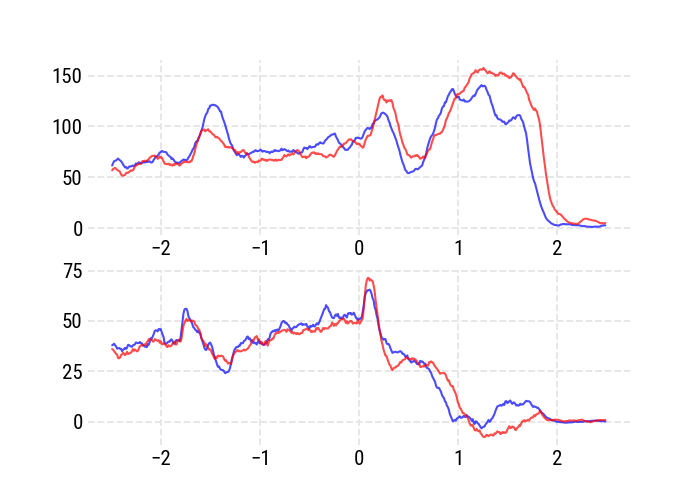

In [26]:
# %% PCA
from sklearn.decomposition import PCA

region = 'left ALM'
cond2use = [3, 4]
dat = psth[region][:, :, cond2use]

datshape = dat.shape
datcat = np.concatenate((dat[:, :, 0], dat[:, :, 1]), axis=0)

pca = PCA(n_components=dat.shape[1])
X = pca.fit_transform(datcat)

X = np.einsum('ijk,cj->ick', dat, pca.components_)

colors = [(0, 0, 1, 0.7),
          (1, 0, 0, 0.7)]    # corresponding colors
fig, ax = plt.subplots(2, 1, figsize=(7, 5))
ax[0].plot(par.time, X[:,0,0],c=colors[0])
ax[0].plot(par.time, X[:,0,1],c=colors[1])
ax[1].plot(par.time, X[:,1,0],c=colors[0])
ax[1].plot(par.time, X[:,1,1],c=colors[1])
plt.show()

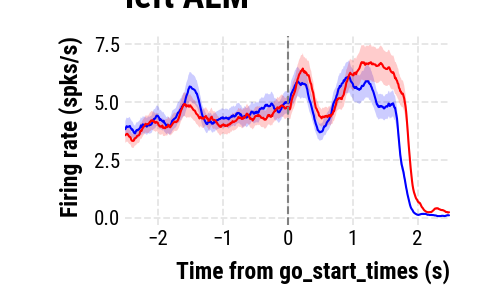

In [27]:
# %% GRAND AVERAGES

regions = ['left ALM']
cols = ('b', 'r')


cond2use = [3, 4]
for region in regions:
    fig, ax = plt.subplots(figsize=(5, 3))
    for i in range(len(cond2use)):
        mu = np.mean(psth[region][:, :, cond2use[i]], 1)
        ci = np.std(psth[region][:, :, cond2use[i]], 1) / \
            np.sqrt(psth[region].shape[1])
        plt.plot(par.time, mu, c=cols[i])
        ax.fill_between(par.time, (mu-ci),
                        (mu+ci), color=cols[i], alpha=0.2, ec='none')
    plt.axvline(0, color=(0.5, 0.5, 0.5), linestyle='--')
    alignEvent = par.alignEvent
    plt.xlabel(f'Time from {alignEvent} (s)')
    plt.ylabel('Firing rate (spks/s)')
    ax.set_xlim(par.tmin, par.tmax)
    plt.title(region)
    plt.subplots_adjust(left=0.25, bottom=0.25)
    plt.show()

    # fpth = os.path.join(
    #     r'C:\Users\munib\Documents\Economo-Lab\code\map-ephys\figs', sub, date)
    # fname = 'grandAverageFiringRate_' + region
    # utils.mysavefig(fpth, fname)